<a href="https://colab.research.google.com/github/bhavikakaura/Dataa-for-Risk-Analysis-of-5G-Network-Security/blob/main/Influence_diagramipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install graphviz
import pandas as pd
from graphviz import Digraph


In [3]:
from google.colab import files
uploaded = files.upload()


Saving realistic_5G_security_dataset (1).csv to realistic_5G_security_dataset (1).csv


In [4]:
import pandas as pd

df = pd.read_csv('realistic_5G_security_dataset (1).csv')  # match exact filename shown
df.head()


,Incident_ID,CVE_ID,Threat_Type,CVSS_Score,Incident_Frequency_Yearly,Economic_Impact_kCAD,Downtime_Hours,Affected_Users_k,Affected_Component
0,INC-00001,CVE-2024-16795,DDoS,6.7,6,100,8,5,User Equipment (UE)
1,INC-00002,CVE-2022-77820,DDoS,5.0,3,1000,24,100,Radio Access Network (RAN)
2,INC-00003,CVE-2024-7265,Unauthorized Access,8.8,5,250,2,20,Radio Access Network (RAN)
3,INC-00004,CVE-2020-38194,Network Slice Breach,6.5,6,500,4,500,Multi-access Edge Computing (MEC)
4,INC-00005,CVE-2020-45131,DDoS,10.0,3,1000,2,20,Radio Access Network (RAN)


In [5]:
# Create influence diagram
dot = Digraph()

# Decision Node (Square)
dot.node('D1', 'Security Investment Level', shape='box')

# Chance Nodes (Circles)
dot.node('C1', 'Threat Type', shape='ellipse')
dot.node('C2', 'CVSS Score', shape='ellipse')
dot.node('C3', 'Incident Frequency', shape='ellipse')

# Consequence Nodes (Diamonds)
dot.node('R1', 'Economic Impact (kCAD)', shape='diamond')
dot.node('R2', 'Downtime (Hours)', shape='diamond')
dot.node('R3', 'Affected Users (k)', shape='diamond')


In [6]:
# Arcs for influences
dot.edges([('D1', 'C3'),  # Security Investment -> Incident Frequency
           ('C1', 'C2'),  # Threat Type -> CVSS Score
           ('C2', 'C3'),  # CVSS -> Frequency
           ('C3', 'R1'),  # Frequency -> Economic Impact
           ('C3', 'R2'),  # Frequency -> Downtime
           ('C3', 'R3'),  # Frequency -> Affected Users
           ('C2', 'R1'),  # CVSS Score -> Economic Impact
           ('C2', 'R2')]) # CVSS Score -> Downtime


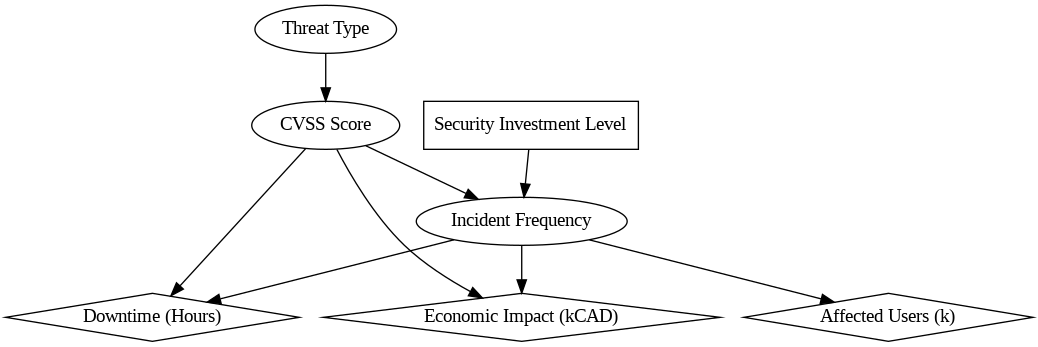

In [7]:
# Render the diagram
dot.render('/content/influence_diagram', format='png', cleanup=False)
from IPython.display import Image
Image('/content/influence_diagram.png')
